# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [28]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [29]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [30]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [31]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

Fraction of total variance in training data that is explained by first 1 components is: 
[0.16404331]
-----------------------------------------------

Fraction of total variance in training data that is explained by first 2 components is: 
[0.16404331 0.13323479]
-----------------------------------------------

Fraction of total variance in training data that is explained by first 3 components is: 
[0.16404331 0.13323479 0.10173457]
-----------------------------------------------

Fraction of total variance in training data that is explained by first 4 components is: 
[0.16404331 0.13323479 0.10173457 0.07063356]
-----------------------------------------------

Fraction of total variance in training data that is explained by first 5 components is: 
[0.16404331 0.13323479 0.10173457 0.07063356 0.03866645]
-----------------------------------------------

Fraction of total variance in training data that is explained by first 10 components is: 
[0.16404331 0.13323479 0.10173457 0.07063356 

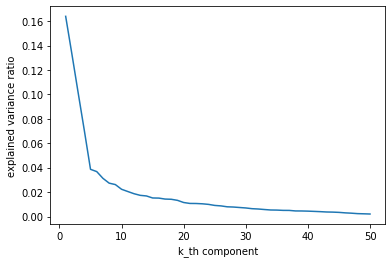

<Figure size 360x360 with 0 Axes>

In [68]:
def P1():

## STUDENT START ###
    k_list = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    
    # Iterating through component sizes.
    
    for k in k_list:
        # Fitting the training data.
        pca = PCA(n_components=k)
        pca.fit_transform(train_data)
        print("Fraction of total variance in training data that is explained by first " + str(k) + 
              " components is: ")
        print(str(pca.explained_variance_ratio_))
        print("-----------------------------------------------")
        print()
        
    # Plotting the fraction of the total variance in the training data is explained by the first 50 principal components.
    
    y = pca.explained_variance_ratio_
    x = np.arange(1, 51)
    plt.plot(x, y)
    plt.xlabel("k_th component")
    plt.ylabel("explained variance ratio")
    plt.figure(figsize=(5,5)); 
    plt.show()
## STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

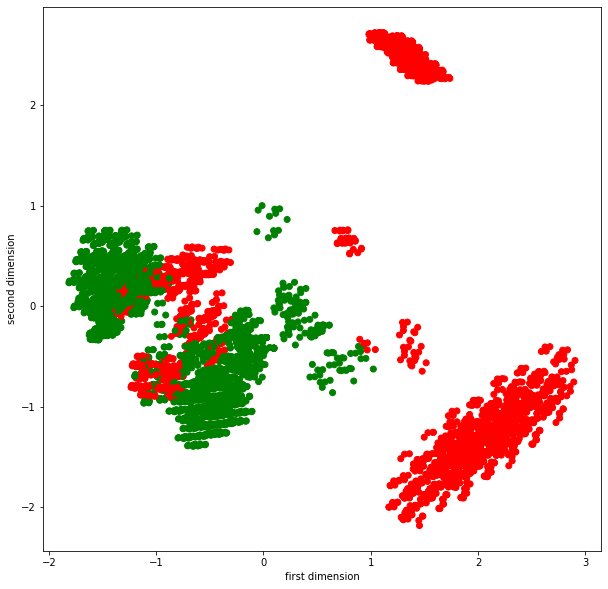

In [70]:
def P2():

## STUDENT START ###

    # Projecting the training data down to 2 dimensions
    
    pca = PCA(n_components=2)
    y_pred = pca.fit_transform(train_data)
    x = y_pred[:,0] 
    y = y_pred[:,1]
    
    colors = []
    for label in train_labels:
        if (label == 0):
            colors.append("g")
        else:
            colors.append("r")
            
    # Showing result as a square scatterplot, where red is poisonous and green is not poisonous
    plt.figure(figsize=(10,10)); 
    plt.scatter(x, y, c = colors)
    plt.xlabel("first dimension")
    plt.ylabel("second dimension")
    
## STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

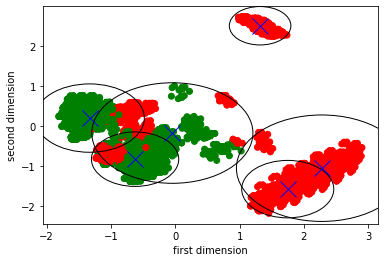

<Figure size 360x360 with 0 Axes>

In [81]:
def P3():

## STUDENT START ###

    # Projecting the training data down to 2 dimensions

    pca = PCA(n_components=2)
    y_pred = pca.fit_transform(train_data)
    kmeans = KMeans(n_clusters=6, init="k-means++").fit(y_pred)
    
    # These variables hold the maximum distance between the centroid and furthest observation for each of the 6 clusters
    
    r0 = 0
    r1 = 0
    r2 = 0
    r3 = 0
    r4 = 0
    r5 = 0
    
    #Algorithm for findings the maximum distanced observation for each cluster
    
    for i in range(len(y_pred)):
        x1, x2 = y_pred[i]
        point = np.array((x1, x2))
        cluster = kmeans.labels_[i]
        centroid = np.array(kmeans.cluster_centers_[cluster])
        if (cluster == 0):
            distance = np.linalg.norm(point - centroid)
            if distance >= r0:
                r0 = distance
        elif (cluster == 1):
            distance = np.linalg.norm(point - centroid)
            if distance >= r1:
                r1 = distance
        elif (cluster == 2):
            distance = np.linalg.norm(point - centroid)
            if distance >= r2:
                r2 = distance
        elif (cluster == 3):
            distance = np.linalg.norm(point - centroid)
            if distance >= r3:
                r3 = distance
        elif (cluster == 4):
            distance = np.linalg.norm(point - centroid)
            if distance >= r4:
                r4 = distance
        elif (cluster == 5):
            distance = np.linalg.norm(point - centroid)
            if distance >= r5:
                r5 = distance

    #Seperating data into first and second dimensions    
    
    x = y_pred[:,0] 
    y = y_pred[:,1]
    
    # Coloring the assigned values.
    
    colors = []
    for label in train_labels:
        if (label == 0):
            colors.append("g")
        else:
            colors.append("r")
            
    # Creating the circles with radius = max distance within each cluster
    
    Circle1= plt.Circle(kmeans.cluster_centers_[0], r0, color = "none", ec = "black")
    Circle2= plt.Circle(kmeans.cluster_centers_[1], r1, color = "none", ec = "black")
    Circle3= plt.Circle(kmeans.cluster_centers_[2], r2, color = "none", ec = "black")
    Circle4= plt.Circle(kmeans.cluster_centers_[3], r3, color = "none", ec = "black")
    Circle5= plt.Circle(kmeans.cluster_centers_[4], r4, color = "none", ec = "black")
    Circle6= plt.Circle(kmeans.cluster_centers_[5], r5, color = "none", ec = "black")

    # Plotting clusters with circles for each cluster and x marker for centroid for each cluster
    fig, ax = plt.subplots()
    plt.scatter(x, y, c = colors)
    plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'bx', markersize= 16)
    plt.xlabel("first dimension")
    plt.ylabel("second dimension")
    ax.add_artist(Circle1)
    ax.add_artist(Circle2)
    ax.add_artist(Circle3)
    ax.add_artist(Circle4)
    ax.add_artist(Circle5)
    ax.add_artist(Circle6)
    plt.figure(figsize=(5,5)) 
## STUDENT END ###

P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

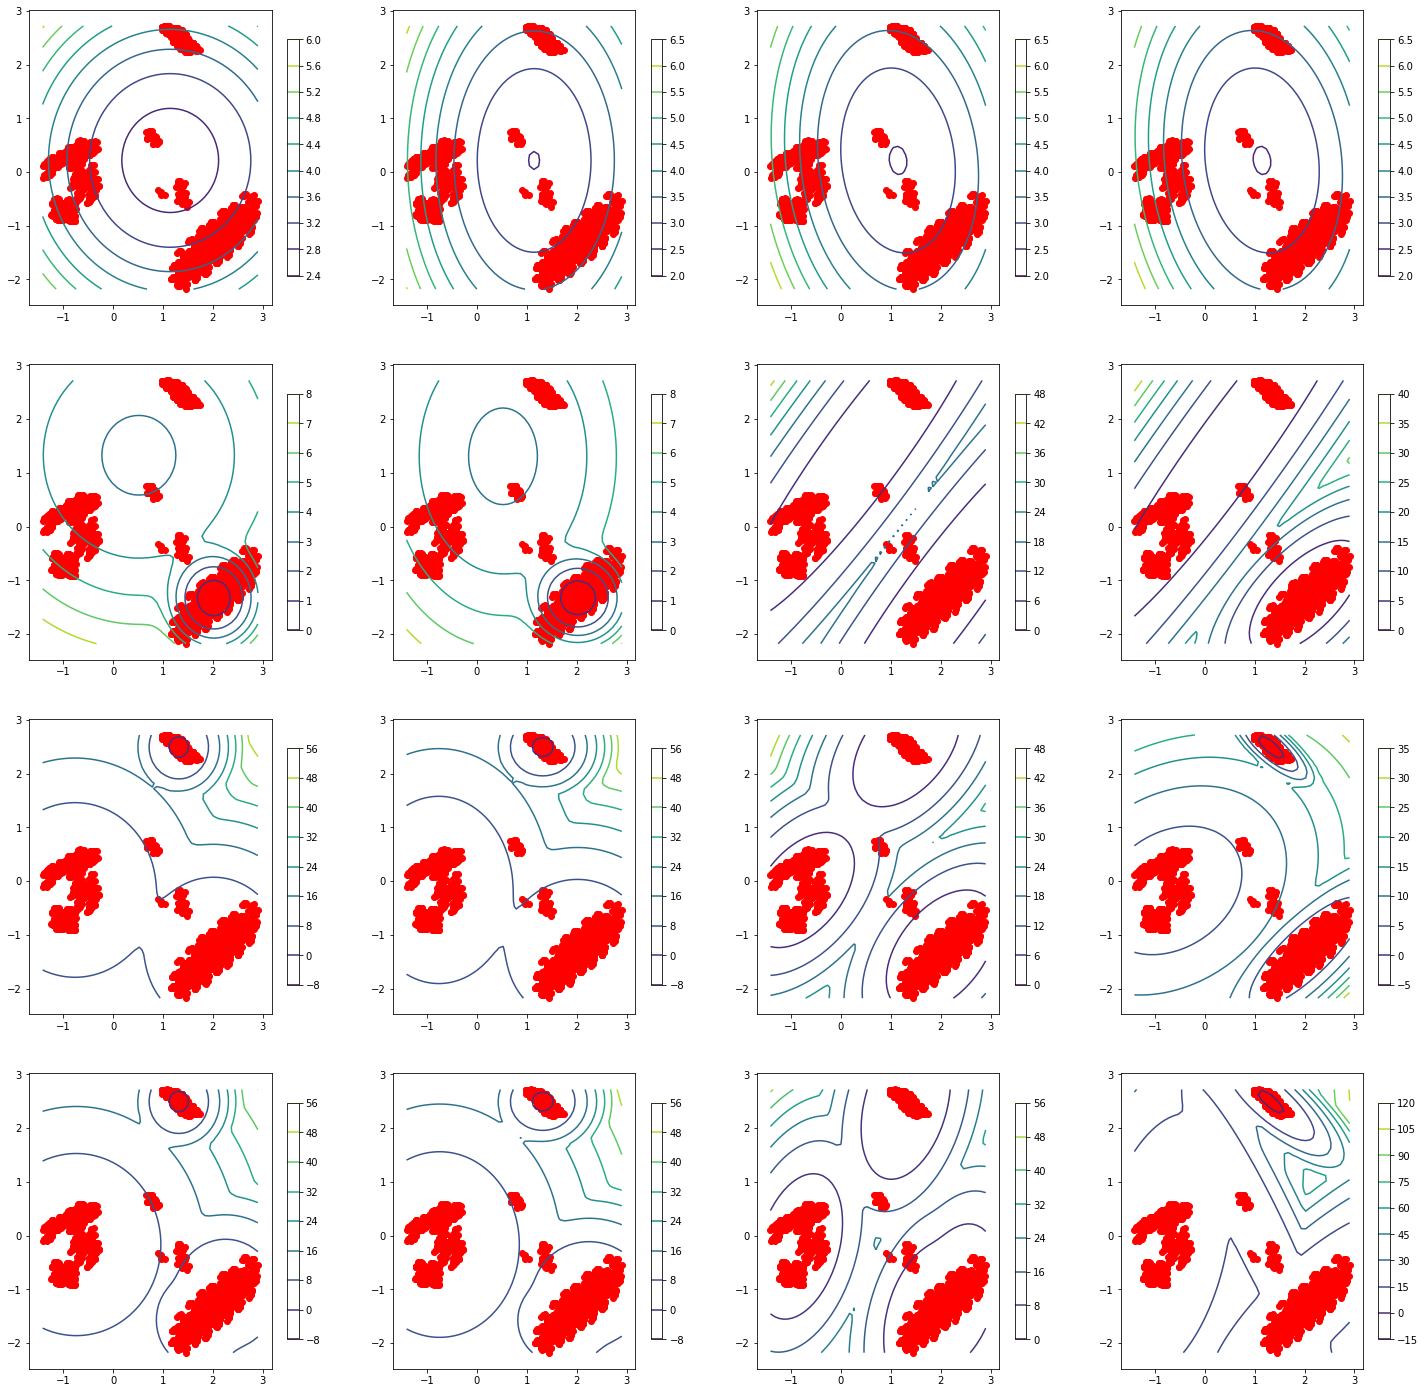

In [82]:
def P4():

## STUDENT START ###

    pca = PCA(n_components=2)
    projected = pca.fit_transform(train_data)
    
    # Filtering for positive data points only
    
    positives = []
    for i in range(len(train_labels)):
        label = train_labels[i]
        if (label > 0):
            positives.append(projected[i])
       
    # Projecting the training data down to 2 dimensions for positive data only

    projected = pca.fit_transform(positives)            
    positives = np.array(positives)
    
    
    # Plotting 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type 
    
    subPlotIndex = 0
    plt.figure(figsize=(25, 25))
    types = ['spherical', 'diag', 'tied', 'full']
    for component in range(1, 5):
        for t in types:  
            subPlotIndex += 1
            plt.subplot(4, 4, subPlotIndex) 
            x = np.linspace(min(positives[:,0]), max(positives[:,0]))
            y = np.linspace(min(positives[:,1]), max(positives[:,1]))
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            
            # Fitting GMM model according to changing gmm_type and n_components
            
            gmm = GaussianMixture(n_components=component, covariance_type=t, random_state=12345)
            gmm.fit(positives)
            
            # Plotting the contour graphs
            
            Z = -gmm.score_samples(XX).reshape(X.shape)
            CS = plt.contour(X, Y, Z)
            CB = plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(positives[:,0], positives[:,1], color='r')
    
    
## STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [83]:
def P5():

## STUDENT START ###

    # Projecting the training data down to 2 dimensions
    
    pca = PCA(n_components=2)
    projected = pca.fit(train_data).transform(train_data)
    # Seperating positive and negative points
    
    negatives = []
    positives = []
    for i in range(len(train_labels)):
        label = train_labels[i]
        if (label > 0):
            positives.append(projected[i])
        else:
            negatives.append(projected[i])        
    positives = np.array(positives)
    negatives = np.array(negatives)
    
    
    # Fitting GMM model to positive and negative data that has been dimensionally reduced to 2 dimensions

    gmm1 = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    gmm2 = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    
    gmm_pos = gmm1.fit(positives)
    gmm_neg = gmm2.fit(negatives)
    
    #Transforming test data
    
    test_data_trimmed = pca.transform(test_data)
    
    # Getting predicted score for the two datasets
    
    scores_pos = gmm_pos.score_samples(test_data_trimmed)
    scores_neg = gmm_neg.score_samples(test_data_trimmed)
    
    # Using max(scores_pos, scores_neg) to predict if a mushroom is poisonous or not
    
    pred = []
    for i in range(len(test_labels)):
        score_pos = scores_pos[i]
        score_neg = scores_neg[i]
        if (score_pos > score_neg):
            pred.append(1)
        else:
            pred.append(0)
            
    # Calculating accuracy        
    
    print("Accuracy: " + str((pred == test_labels).mean()))

## STUDENT END ###

P5()

Accuracy: 0.9501779359430605


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

In [84]:
def P6():

## STUDENT START ###

    # Creating function to return the number of components 
    
    def number_of_components(n_pca, n_gmm, n_classes, t):
        if (t == 'full'):
            return (n_pca * n_gmm) + (n_pca *(n_pca + 1)/ 2 * n_gmm) * n_classes
        elif (t == 'diag'):
            return (n_pca*n_gmm + n_pca * n_gmm) * n_classes
        elif (t == 'spherical'):
            return (n_pca*n_gmm + n_gmm) * n_classes
        elif (t == 'tied'):
            return (n_pca * n_gmm + n_pca * (n_pca + 1) / 2) * n_classes
    
    #Relevant variables used to iterate or store important info like best component number
    types = ['spherical', 'diag', 'tied', 'full']
    best_accuracy = 0
    best_n_components = 0
    best_pca_comp = 0
    best_gmm_n_comp = 0
    best_gmm_t = 0
    
    for pca_comp in range(1, 10):
        for gmm_n_comp in range(1, 5):
            for gmm_t in types:  
                
                # Calculating number of components and checking that it is at most 50
                
                n_components = number_of_components(pca_comp, gmm_n_comp, 2, gmm_t)
                if (n_components <= 50):
                    
                    # Using PCA to reduce dimension to pca_comp dimensions 
                    
                    pca = PCA(n_components=pca_comp)
                    projected = pca.fit_transform(train_data)
                    
                    # Fitting to GMM model according to changing n_components and covariance_type
                    
                    gmm = GaussianMixture(n_components=pca_comp, covariance_type=gmm_t, random_state=12345)
                    gmm_fitted = gmm.fit(projected)
                    test_data_trimmed = pca.fit_transform(test_data)
                    
                    # Calculating accuracy
                    
                    pred = gmm_fitted.predict(test_data_trimmed)
                    accuracy = (pred == test_labels).mean()
                    print("Accuracy with " + str(n_components) + " components is : " + str(accuracy))
                    print("------------------------------------------------")
                    if (accuracy > best_accuracy):
                        best_accuracy = accuracy
                        best_n_components = n_components
                        best_pca_comp = pca_comp
                        best_gmm_n_comp = gmm_n_comp
                        best_gmm_t = gmm_t
    
    # Printing best result
    
    print()
    print("BEST ACCURACY = " + str(best_accuracy) + " WITH " + str(best_n_components) + " COMPONENTS.")
    print("THIS IS WITH n_pca = " + str(best_pca_comp) + " , n_gmm = " + str(best_gmm_n_comp) + ", and t =" + best_gmm_t)
## STUDENT END ###

P6()

Accuracy with 4 components is : 0.3612099644128114
------------------------------------------------
Accuracy with 4 components is : 0.3612099644128114
------------------------------------------------
Accuracy with 4.0 components is : 0.3612099644128114
------------------------------------------------
Accuracy with 3.0 components is : 0.3612099644128114
------------------------------------------------
Accuracy with 8 components is : 0.3612099644128114
------------------------------------------------
Accuracy with 8 components is : 0.3612099644128114
------------------------------------------------
Accuracy with 6.0 components is : 0.3612099644128114
------------------------------------------------
Accuracy with 6.0 components is : 0.3612099644128114
------------------------------------------------
Accuracy with 12 components is : 0.3612099644128114
------------------------------------------------
Accuracy with 12 components is : 0.3612099644128114
---------------------------------------